<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Backpropagation Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Implement a 3 input, 4 node hidden-layer, 1 output node Multilayer Perceptron on the following dataset:

| x1 | x2 | x3 | y |
|----|----|----|---|
| 0  | 0  | 1  | 0 |
| 0  | 1  | 1  | 1 |
| 1  | 0  | 1  | 1 |
| 0  | 1  | 0  | 1 |
| 1  | 0  | 0  | 1 |
| 1  | 1  | 1  | 0 |
| 0  | 0  | 0  | 0 |

If you look at the data you'll notice that the first two columns behave like an XOR gate while the last column is mostly just noise. Remember that creating an XOR gate was what the perceptron was criticized for not being able to learn. 

In [1]:
import numpy as np

X = np.array(([0,0,1],
             [0,1,1],
             [1,0,1],
             [0,1,0],
             [1,0,0],
             [1,1,1],
             [0,0,0]))

y = np.array(([0],
             [1],
             [1],
             [1],
             [1],
             [0],
             [0]))

In [2]:
class NeuralNetwork:
    
    def __init__(self):
        self.inputs = 3
        self.hiddenNodes = 3
        self.outputNodes = 1
        
        self.weights1 = np.random.randn(self.inputs, self.hiddenNodes)
        self.weights2 = np.random.randn(self.hiddenNodes, self.outputNodes)
        
    def sigmoid(self, s):
        return 1 / (1 + np.exp(-s))
    
    def sigmoidPrime(self, s):
        return s * (1 - s)
    
    def feed_forward(self, X):
        self.hidden_sum = np.dot(X, self.weights1)
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        self.output_sum = np.dot(self.activated_hidden, self.weights2)
        self.activated_output = self.sigmoid(self.output_sum)
        return self.activated_output
    
    def backward(self, X, y, o):
        self.o_error = y - o
        self.o_delta = self.o_error * self.sigmoidPrime(o)
        self.z2_error = self.o_delta.dot(self.weights2.T)
        self.z2_delta = self.z2_error * self.sigmoidPrime(self.activated_hidden)
        self.weights2 += self.activated_hidden.T.dot(self.o_delta)
        self.weights1 += X.T.dot(self.z2_delta)
        
    def train(self, X, y):
        o = self.feed_forward(X)
        self.backward(X, y, o)

In [8]:
nn = NeuralNetwork()

for i in range(10000):
    if (i+1 in [1,2,3,4,5]) or ((i + 1) % 50 == 0):
       print('+' + '---' * 3 + f'EPOCH {i+1}' + '---' * 3 + '+')
       print('Input: \n', X)
       print('Actual output: \n', y)
       print('Predicted output: \n', str(nn.feed_forward(X)))
       print('Loss: \n', str(np.mean(np.square(y - nn.feed_forward(X)))))
    nn.train(X, y)

+---------EPOCH 1---------+
Input: 
 [[0 0 1]
 [0 1 1]
 [1 0 1]
 [0 1 0]
 [1 0 0]
 [1 1 1]
 [0 0 0]]
Actual output: 
 [[0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]]
Predicted output: 
 [[0.20445641]
 [0.22108146]
 [0.12302751]
 [0.22281313]
 [0.12346085]
 [0.15265835]
 [0.20621623]]
Loss: 
 0.40796675451078973
+---------EPOCH 2---------+
Input: 
 [[0 0 1]
 [0 1 1]
 [1 0 1]
 [0 1 0]
 [1 0 0]
 [1 1 1]
 [0 0 0]]
Actual output: 
 [[0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]]
Predicted output: 
 [[0.27904643]
 [0.31406563]
 [0.19331619]
 [0.30551047]
 [0.18491144]
 [0.24272471]
 [0.26769954]]
Loss: 
 0.35376786101222196
+---------EPOCH 3---------+
Input: 
 [[0 0 1]
 [0 1 1]
 [1 0 1]
 [0 1 0]
 [1 0 0]
 [1 1 1]
 [0 0 0]]
Actual output: 
 [[0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]]
Predicted output: 
 [[0.37032137]
 [0.42549002]
 [0.29339911]
 [0.40480118]
 [0.27165722]
 [0.36453105]
 [0.34380795]]
Loss: 
 0.3003308694941801
+---------EPOCH 4---------+
Input: 
 [[0 0 1]
 [0 1 1]
 [1 0 1]
 [0 1 0]
 [1 0 0]
 [1 1 1]
 [0 0 0

## Try building/training a more complex MLP on a bigger dataset.

Use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) to build the cannonical handwriting digit recognizer and see what kind of accuracy you can achieve. 

If you need inspiration, the internet is chalk-full of tutorials, but I want you to see how far you can get on your own first. I've linked to the original MNIST dataset above but it will probably be easier to download data through a neural network library. If you reference outside resources make sure you understand every line of code that you're using from other sources, and share with your fellow students helpful resources that you find.


In [10]:
import tensorflow
import keras

In [11]:
from keras.datasets import mnist

In [14]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 5s 0us/step


In [21]:
x_test.shape

(10000, 28, 28)

In [25]:
x_train = x_train[:10000]
y_train = y_train[:10000]
x_test = x_test[:2000]
y_test = y_test[:2000]

In [47]:
y_train.shape

(10000,)

In [56]:
# https://jonathanweisberg.org/post/A%20Neural%20Network%20from%20Scratch%20-%20Part%201/

from sklearn.datasets import fetch_mldata
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [57]:
# normalizing to keep gradients manageable

X = X / 255

In [60]:
# cutting down model size from 70k to 20k

X = X[:20000]
y = y[:20000]

In [62]:
# one hot encoding labels

digits = 10
examples = y.shape[0]

y = y.reshape(1, examples)

Y_new = np.eye(digits)[y.astype('int32')]
y_new = Y_new.T.reshape(digits, examples)

In [64]:
m = 16000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
y_train, y_test = y_new[:,:m], y_new[:,m:]

shuffle_index = np.random.permutation(m)
X_train, y_train = X_train[:, shuffle_index], y_train[:, shuffle_index]

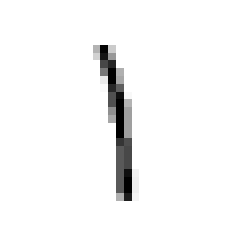

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [69]:
# check to make sure images are correct
# looks wrong, but continuing
i = 12
plt.imshow(X_train[:,i].reshape(28,28), cmap=matplotlib.cm.binary)
plt.axis('off')
plt.show()
y_train[:, i]

In [70]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [71]:
def compute_loss(y, y_hat):
    m = y.shape[1]
    L = -(1./m) * (np.sum(np.multiply(np.log(y_hat), y)) + np.sum(np.multiply(np.log(1-y_hat), (1-y))))
    return L

In [73]:
learning_rate = 1

X = X_train
y = y_train

n_x = X.shape[0]
m = X.shape[1]

W = np.random.randn(n_x, 1) * 0.01
b = np.zeros((1,1))

for i in range(2000):
    Z = np.matmul(W.T, X) + b
    A = sigmoid(Z)
    
    cost = compute_loss(y, A)
    
    dW = (1 / m) * np.matmul(X, (A-y).T)
    db = (1 / m) * np.sum(A - y, axis=1, keepdims=True)
    
    W = W - learning_rate * dW
    b = b - learning_rate * db
    
    if (i % 100 == 0):
        print('epoch', i, 'cost', cost)
        
print('final cost', cost)

epoch 0 cost 6.74278361333475
epoch 100 cost 0.81674723257242
epoch 200 cost 0.7406096361995596
epoch 300 cost 0.7031483813755888
epoch 400 cost 0.6793129524426924
epoch 500 cost 0.6622510769009445
epoch 600 cost 0.6491707246404798
epoch 700 cost 0.6386789869323581
epoch 800 cost 0.6299878423666417
epoch 900 cost 0.6226113895663421
epoch 1000 cost 0.6162306520744201
epoch 1100 cost 0.6106260405042467
epoch 1200 cost 0.6056406455507015
epoch 1300 cost 0.6011589296506237
epoch 1400 cost 0.5970936864841146
epoch 1500 cost 0.5933777080490904
epoch 1600 cost 0.5899582656347377
epoch 1700 cost 0.5867933427876322
epoch 1800 cost 0.5838489974749435
epoch 1900 cost 0.5810974738679868
final cost 0.5785408658539665


In [74]:
from sklearn.metrics import classification_report, confusion_matrix

Z = np.matmul(W.T, X_test) + b
A = sigmoid(Z)

predictions = (A>0.5)[0,:]
labels = (y_test ==1)[0,:]

print(confusion_matrix(predictions, labels))

[[3591   28]
 [  21  360]]


In [75]:
print(classification_report(predictions, labels))

              precision    recall  f1-score   support

       False       0.99      0.99      0.99      3619
        True       0.93      0.94      0.94       381

    accuracy                           0.99      4000
   macro avg       0.96      0.97      0.96      4000
weighted avg       0.99      0.99      0.99      4000



In [78]:
X = X_train
Y = y_train

n_x = X.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(1, n_h)
b2 = np.zeros((1, 1))

for i in range(2000):

    Z1 = np.matmul(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2, A1) + b2
    A2 = sigmoid(Z2)

    cost = compute_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if i % 100 == 0:
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 10 is different from 1)

In [79]:
def compute_multiclass_loss(Y, Y_hat):
    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum
    
    return L

In [80]:
n_x = X_train.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(digits, n_h)
b2 = np.zeros((digits, 1))

X = X_train
Y = y_train

for i in range(2000):
    Z1 = np.matmul(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2, A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)
    
    cost = compute_multiclass_loss(Y, A2)
    
    dZ2 = A2 - Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)
    
    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)
    
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    
    if (i % 100 == 0):
        print('epoch', i, 'cost:', cost)
        
print('final cost:', cost)

epoch 0 cost: 10.510302623879946
epoch 100 cost: 0.6979348025829354
epoch 200 cost: 0.522924327577207
epoch 300 cost: 0.44405623396352084
epoch 400 cost: 0.3952916134453918
epoch 500 cost: 0.3611004413186918
epoch 600 cost: 0.3350525723429301
epoch 700 cost: 0.3140451796721618
epoch 800 cost: 0.296399236060293
epoch 900 cost: 0.2811313955953094
epoch 1000 cost: 0.26765331308892043
epoch 1100 cost: 0.25559363259304313
epoch 1200 cost: 0.24469571038958668
epoch 1300 cost: 0.23476590362739477
epoch 1400 cost: 0.22565578294712624
epoch 1500 cost: 0.217251848329478
epoch 1600 cost: 0.20944990317530016
epoch 1700 cost: 0.20215690950595125
epoch 1800 cost: 0.19530180403196712
epoch 1900 cost: 0.1888342087024636
final cost: 0.18277414936162903


In [81]:
# %matplotlib inline
# import matplotlib
# import matplotlib.pyplot as plt

# i = 3
# plt.imshow(x_train[:,i], cmap=matplotlib.cm.binary)
# plt.axis('off')
# plt.show
# print(y_train[:,i])

In [33]:
import matplotlib.pyplot as plt
image_size = 28
no_of_different_labels = 10
image_pixels = image_size * image_size

# greyscale pixels range between 0 and 255
fac = 0.99 / 255

x_train = np.asfarray(x_train[:, 1:]) * fac + 0.01
x_test = np.asfarray(x_test[:, 1:]) * fac + 0.01
y_train = np.asfarray(y_train[:, :1])
y_test = np.asfarray(y_test[:, :1])

IndexError: too many indices for array

In [36]:
# https://www.python-course.eu/neural_network_mnist.php

def sigmoid(x):
    return 1 / (1 + np.e ** -x)
activation_function = sigmoid
from scipy.stats import truncnorm
def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd,
                    (upp - mean) / sd,
                    loc=mean,
                    scale=sd)

class Neural_Network(object):
    
    def __init__(self,
                no_of_in_nodes,
                no_of_out_nodes,
                learning_rate,
                bias=None):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate
        self.bias = bias
        self.create_weight_matrices()
        
    def create_weight_matrices(self):
        """
        a method to initialize weight matrices of NN with optional bias nodes
        """
        
        bias_node = 1 if self.bias else 0
        
        rad = 1 / np.sqrt(self.no_of_in_nodes + bias_node)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.wih = X.rvs((self.no_of_hidden_nodes,
                         self.no_of_in_nodes + bias_node))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes + bias_node)
        X = truncated_normal(mean=0,
                            sd=1,
                            low=-rad,
                            upp=rad)

        self.who = X.rvs((self.no_of_out_nodes,
                         self.no_of_hidden_nodes + bias_node))
        
    def train_single(self, input_vector, target_vector):
        """
        input_vector and target_vector can be tuple, list or ndarray
        """
        
        bias_node = 1 if self.bias else 0
        if self.bias:
            # adding bias node to end of the input_vector
            input_vector = np.concatenate((input_vector, [self.bias]))
            
        output_vectors = []
        input_vector = np.array(input_vector, ndmin=2).T
        target_vector = np.array(target_vector, ndmin=2).T
        
        output_vector1 = np.dot(self.wih, input_vector)
        output_hidden = activation_function(output_vector1)
        
        if self.bias:
            output_hidden = np.concatenate((output_hidden, [[self.bias]]))
            
        output_vector2 = np.dot(self.who, output_hidden)
        output_network = activation_function(output_vector2)
            
        output_errors = target_vector - output_network
        
        # update the weights
        tmp = output_errors * output_network * (1.0 - output_network)
        tmp = self.learning_rate * np.dot(tmp, output_hidden.T)
        self.who += tmp
        
        # calculate hidden errors
        hidden_errors = np.dot(self.who.T, output_errors)
        # update the weights
        tmp = hidden_errors * output_hidden * (1.0 - output_hidden)
        
        if self.bias:
            x = np.dot(tmp, input_vector.T)[:-1, :]
        else:
            x = np.dot(tmp, input_vector.T)
        
        self.wih += self.learning_rate * x
        
    def train(self, data_array, labels_one_hot_array,
             epochs=1, intermediate_results=False):
        
        intermediate_weights = []
        for epoch in range(epochs):
            for i in range(len(data_array)):
                self.train_single(data_array[i], labels_one_hot_array[i])
                
            if intermediate_results:
                intermediate_weights.append((self.wih.copy(),
                                            self.who.copy()))
                
        return intermediate_weights
    
    def run(self, input_vector):
        
        if self.bias:
            input_vector = np.concatenate((input_vector, [self.bias]))
            
        input_vector = np.array(input_vector, ndmin=2).T
        output_vector = np.dot(self.wih, input_vector)
        output_vector = activation_function(output_vector)
        
        if self.bias:
            output_vector = np.concatenate((output_vector, [[self.bias]]))
            
        output_vector = np.dot(self.who, output_vector)
        output_vector = activation_function(output_vector)
        
        return output_vector
    
    def evaluate(self, data, labels):
        corrects, wrongs = 0, 0
        for i in range (len(data)):
            res = self.run(data[i])
            res_max = res.argmax()
            if res_max == labels[i]:
                corrects += 1
            else:
                wrongs += 1
        return corrects, wrongs

In [38]:
epochs = 12
network = NeuralNetwork(no_of_in_nodes=image_pixels,
                       no_of_out_nodes=10,
                       no_of_hidden_nodes=100,
                       learning_rate=0.1,
                       bias=None)
weights = network.train(x_train, y_train, epochs=epochs, intermediate_results=True)

for epoch in range(epochs):
    print('epoch:', epoch)
    network.wih = weights[epoch][0]
    network.who = weights[epoch][1]
    corrects, wrongs = network.evaluate(x_train, y_train)
    print('accuracy train;', corrects / (corrects + wrongs))
    corrects, wrongs = network.evaluate(x_test, y_test)
    print('accuracy test:', corrects / (corrects + wrongs))

TypeError: __init__() got an unexpected keyword argument 'no_of_in_nodes'

#### Stretch Goals: 

- Implement Cross Validation model evaluation on your MNIST implementation 
- Research different [Gradient Descent Based Optimizers](https://keras.io/optimizers/)
 - [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)
- Build a housing price estimation model using a neural network. How does its accuracy compare with the regression models that we fit earlier on in class?